## import necessary libraries

In [1]:
import re
import nltk
import string
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option("display.max_colwidth",200)
warnings.filterwarnings("ignore",category=DeprecationWarning)
%matplotlib inline


In [2]:
train=pd.read_csv('C:\\Users\\user\\Downloads\\sentiment analysis\\train_E6oV3lV.csv')
test=pd.read_csv('C:\\Users\\user\\Downloads\\sentiment analysis\\test_tweets_anuFYb8.csv')

In [3]:
train[train['label']==0].head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo
6,7,0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦
7,8,0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl
8,9,0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦
9,10,0,@user @user welcome here ! i'm it's so #gr8 !


In [4]:
train[train['label']==1].head(10)

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'build the wall' chant '' #tcot
14,15,1,no comment! in #australia #opkillingbay #seashepherd #helpcovedolphins #thecove #helpcovedolphins
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'd need something like this. again. #neverump #xenophobia
56,57,1,@user lets fight against #love #peace
68,69,1,ð©the white establishment can't have blk folx running around loving themselves and promoting our greatness
77,78,1,"@user hey, white people: you can call people 'white' by @user #race #identity #medâ¦"
82,83,1,how the #altright uses &amp; insecurity to lure men into #whitesupremacy
111,112,1,@user i'm not interested in a #linguistics that doesn't address #race &amp; . racism is about #power. #raciolinguistics bringsâ¦


### label distribution

In [5]:
label_counts=train['label'].value_counts()
label_counts

0    29720
1     2242
Name: label, dtype: int64

In [6]:
label_percentages = (label_counts / len(train)) *100 
label_percentages

0    92.98542
1     7.01458
Name: label, dtype: float64


Nearly 93% of the dataset contains non racist tweets and 7% contains racist tweets.

So its an imbalanced dataset

## Distribution of lengths of tweets in both training and testing dataset

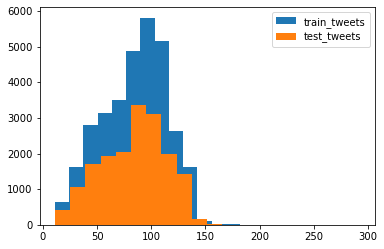

In [7]:
length_train=train['tweet'].str.len()
length_test=test['tweet'].str.len()
plt.hist(length_train,bins=20,label='train_tweets')
plt.hist(length_test,bins=20,label='test_tweets')
plt.legend()
plt.show()

## combining training and testing dataset for preprocessig convinience

In [16]:
combi=train.append(test,ignore_index=True)
combi.shape

C:\Users\user\AppData\Local\Temp\ipykernel_4912\895996237.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combi=train.append(test,ignore_index=True)


(49159, 3)

###  Removing unwanted text patterns 

In [17]:
def remove_pattern(input_txt,pattern):
    r=re.findall(pattern,input_txt)
    for i in r:
        input_txt=re.sub(i, '',input_txt)
    return input_txt

removing @user as it hardly gives any info
removing punctuations,numbers,special characters
removing small txts like his,her,all,a,an

In [18]:
combi['tidy_tweet']=np.vectorize(remove_pattern)(combi['tweet'],"@[\w]*")
combi.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


In [20]:
import warnings

# Suppress future warning
warnings.simplefilter(action='ignore', category=FutureWarning)

combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[^a-zA-Z#]"," ")

# Now your code will run without displaying the warning
combi.head()



,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can t use cause they don t offer wheelchair vans in pdx #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in ur
4,5,0.0,factsguide: society now #motivation,factsguide society now #motivation


In [21]:
combi['tidy_tweet']= combi['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
combi.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when father dysfunctional selfish drags kids into dysfunction #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks #lyft credit cause they offer wheelchair vans #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation


### Text Normalization

In [22]:
tokenized_tweet= combi['tidy_tweet'].apply(lambda x: x.split()) 
tokenized_tweet.head()

0                [when, father, dysfunctional, selfish, drags, kids, into, dysfunction, #run]
1    [thanks, #lyft, credit, cause, they, offer, wheelchair, vans, #disapointed, #getthanked]
2                                                                     [bihday, your, majesty]
3                                                            [#model, love, take, with, time]
4                                                          [factsguide, society, #motivation]
Name: tidy_tweet, dtype: object

In [23]:
from nltk.stem.porter import *
stemmer = PorterStemmer()
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x])


In [24]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i]= ' '.join(tokenized_tweet[i])
combi['tidy_tweet'] = tokenized_tweet

### Visualization

In [25]:
combi['tidy_tweet']

0                                             when father dysfunct selfish drag kid into dysfunct #run
1                               thank #lyft credit caus they offer wheelchair van #disapoint #getthank
2                                                                                  bihday your majesti
3                                                                           #model love take with time
4                                                                             factsguid societi #motiv
                                                     ...                                              
49154               thought factori left right polaris #trump #uselect #leadership #polit #brexit #blm
49155                       feel like mermaid #hairflip #neverreadi #formal #wed #gown #dress #mermaid
49156    #hillari #campaign today #ohio use word like asset liabil never onc #clinton thee word #radic
49157                         happi work confer right mindset lead cultur

In [26]:
import re

# Function to collect hashtags
def hashtag_extract(x):
    hashtags = []
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.extend(ht)
    return hashtags

# Extracting hashtags from non-racist/sexist tweets
HT_regular = hashtag_extract(combi['tidy_tweet'][combi['label'] == 0])

# Extracting hashtags from racist/sexist tweets
HT_negative = hashtag_extract(combi['tidy_tweet'][combi['label'] == 1])

# No need for sum(), just extend the lists directly
HT_regular_final = []
HT_regular_final.extend(HT_regular)

HT_negative_final = []
HT_negative_final.extend(HT_negative)



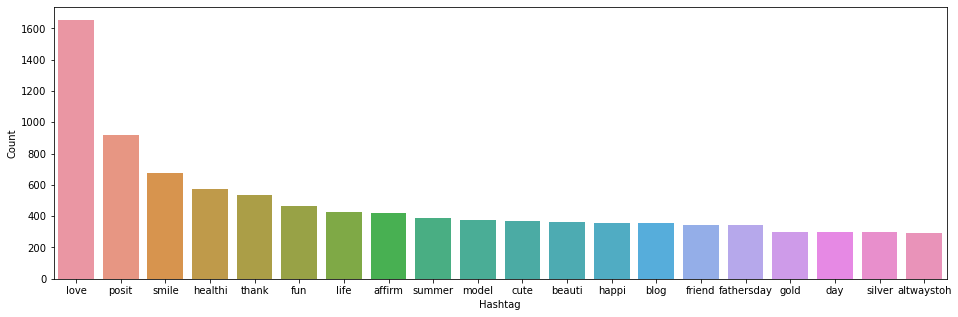

In [27]:
a = nltk.FreqDist(HT_regular_final) 
d = pd.DataFrame({'Hashtag': list(a.keys()),'Count': list(a.values())})

#selecting top 20 most frequent hashtags

d = d.nlargest (columns="Count", n = 20 ) 
plt.figure(figsize=(16,5)) 
ax =sns.barplot(data=d, x= "Hashtag", y ="Count") 
ax.set(ylabel = 'Count')

plt.show()

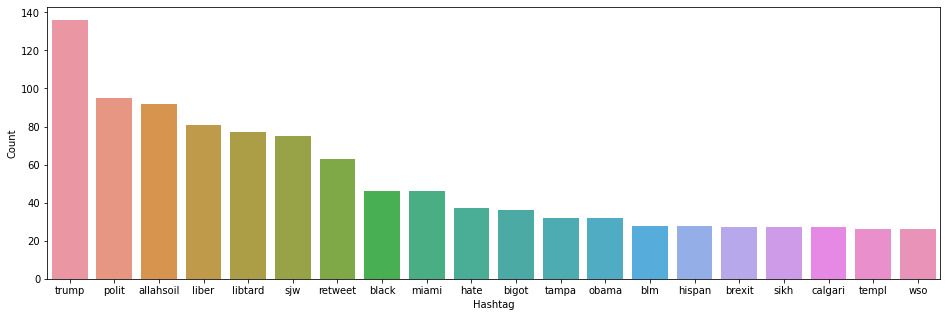

In [28]:
b = nltk.FreqDist(HT_negative_final) 
e = pd.DataFrame({'Hashtag': list(b.keys()),'Count': list(b.values())})

#selecting top 20 most frequent hashtags

e = e.nlargest (columns="Count", n = 20 ) 
plt.figure(figsize=(16,5)) 
ax =sns.barplot(data=e, x= "Hashtag", y ="Count") 
ax.set(ylabel = 'Count')

plt.show()

### Bag of words

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer 
import gensim

In [30]:
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000,stop_words='english') 
bow = bow_vectorizer.fit_transform(combi['tidy_tweet']) 
bow.shape

(49159, 1000)

### TF-IDF 

In [31]:
tfidf_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000,stop_words='english') 
tfidf = tfidf_vectorizer.fit_transform(combi['tidy_tweet']) 
tfidf.shape

(49159, 1000)

### WORD2VEC

In [33]:
tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split()) 

model_w2v = gensim.models.Word2Vec(tokenized_tweet, vector_size=200, window=5, min_count=2, sg=1, hs=0, negative=10, workers=2, seed=34)

model_w2v.train(tokenized_tweet, total_examples= len(combi['tidy_tweet']), epochs=20)

(6510384, 7536020)

In [34]:
model_w2v.wv.get_vector('dinner')


array([ 2.61601985e-01,  7.98656121e-02,  6.81609750e-01, -7.13787973e-02,
       -1.17202356e-01, -1.20132431e-01, -2.44210035e-01,  4.65233289e-02,
       -7.23089725e-02, -1.65748149e-01,  1.08154029e-01, -1.11054905e-01,
       -6.85428560e-01,  7.19831944e-01, -3.51506293e-01, -3.81578863e-01,
        6.46749437e-01,  5.49175382e-01, -1.58096422e-02, -1.12471180e-02,
       -1.39857396e-01,  1.72382355e-01, -2.10988596e-01, -1.01240918e-01,
       -6.02604032e-01,  1.29102707e-01, -9.75345552e-01, -2.28971660e-01,
        4.69364047e-01, -9.88000259e-02,  3.97931904e-01, -4.86491203e-01,
       -2.98489213e-01, -1.40755668e-01, -5.59087396e-01, -3.79500270e-01,
       -1.51742727e-01, -3.41244936e-01,  3.71541023e-01, -4.32383567e-01,
       -7.33620703e-01, -2.47875318e-01, -2.83931881e-01,  3.50303531e-01,
       -3.44085284e-02,  2.74026066e-01,  4.49936002e-01,  5.07665910e-02,
       -2.85174698e-01, -1.52460217e-01,  3.59871447e-01, -4.84959245e-01,
        4.41364765e-01,  

In [35]:
model_w2v.wv.get_vector('trump')


array([ 9.29959491e-02,  2.24756766e-02,  3.07096720e-01, -2.51857460e-01,
       -2.56559283e-01, -1.54081389e-01, -1.11298524e-01, -4.45128262e-01,
        1.21427655e+00, -9.69261646e-01,  4.02287215e-01, -3.55474383e-01,
       -2.35883832e-01,  2.27651283e-01, -4.67389643e-01, -1.97763070e-01,
       -5.76174967e-02, -3.03707533e-02, -3.38991806e-02, -8.64113033e-01,
        2.34053403e-01, -7.92411342e-02, -5.76093376e-01, -5.36868036e-01,
       -1.63234994e-01, -2.67603118e-02, -1.01787448e+00,  6.93445981e-01,
        3.46592511e-04, -3.95114534e-02,  4.29781787e-02, -5.94524503e-01,
       -6.02692226e-03,  1.37290880e-01, -3.84415835e-01, -3.53627675e-03,
       -3.25990379e-01, -9.79746226e-03,  3.91922027e-01, -6.06965184e-01,
        1.76312685e-01, -4.40402359e-01,  3.65328282e-01, -1.43880084e-01,
       -1.23481941e+00,  2.07305074e-01, -2.04684407e-01, -2.76108742e-01,
        2.63978578e-02, -4.19226676e-01,  5.62637895e-02, -2.62105763e-01,
       -1.80539295e-01, -

In [36]:
len(model_w2v.wv.get_vector('trump'))

200

In [37]:
def word_vector(tokens, size, model):
    vec = np.zeros(size).reshape((1, size))
    count = 0
    for word in tokens:
        try:
            vec += model.wv[word].reshape((1, size))
            count += 1
        except KeyError:
            continue
    if count != 0:
        vec = vec / count
    return vec


In [38]:
wordvec_arrays = np.zeros((len(tokenized_tweet), 200))

for i in range(len(tokenized_tweet)):
    wordvec_arrays[i, :] = word_vector(tokenized_tweet[i], 200, model_w2v)

wordvec_df = pd.DataFrame(wordvec_arrays)
wordvec_df.shape


(49159, 200)

In [39]:
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models.doc2vec import TaggedDocument

def add_label(twt):
    output = []
    for i, s in zip(twt.index, twt):
        output.append(TaggedDocument(words=s, tags=["tweet_" + str(i)]))
    return output

labeled_tweets = add_label(tokenized_tweet)
labeled_tweets[:6]


[TaggedDocument(words=['when', 'father', 'dysfunct', 'selfish', 'drag', 'kid', 'into', 'dysfunct', '#run'], tags=['tweet_0']),
 TaggedDocument(words=['thank', '#lyft', 'credit', 'caus', 'they', 'offer', 'wheelchair', 'van', '#disapoint', '#getthank'], tags=['tweet_1']),
 TaggedDocument(words=['bihday', 'your', 'majesti'], tags=['tweet_2']),
 TaggedDocument(words=['#model', 'love', 'take', 'with', 'time'], tags=['tweet_3']),
 TaggedDocument(words=['factsguid', 'societi', '#motiv'], tags=['tweet_4']),
 TaggedDocument(words=['huge', 'fare', 'talk', 'befor', 'they', 'leav', 'chao', 'disput', 'when', 'they', 'there', '#allshowandnogo'], tags=['tweet_5'])]

In [40]:
model_d2v = gensim.models.Doc2Vec(dm=1, dm_mean=1,vector_size=200, window=5, negative=7, min_count=5, workers=3, alpha=0.1, seed=23)
model_d2v.build_vocab([i for i in tqdm(labeled_tweets)])
model_d2v.train(labeled_tweets, total_examples=len(combi['tidy_tweet']), epochs=15)

docvec_arrays = np.zeros((len(tokenized_tweet), 200))

for i in range(len(combi)):
    docvec_arrays[i, :] = model_d2v.docvecs[i].reshape((1, 200))

docvec_df = pd.DataFrame(docvec_arrays)
docvec_df.shape


100%|███████████████████████████████████████████████████████████████████████| 49159/49159 [00:00<00:00, 2460093.19it/s]


(49159, 200)

### modeling

### Logistic regression

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

### on BOW features

In [42]:
train_bow=bow[:31962,:] 
test_bow=bow [31962:,:]

xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, train['label'], random_state=42, test_size=0.3)


lreg = LogisticRegression()

#training the model 
lreg.fit(xtrain_bow, ytrain)

prediction = lreg.predict_proba(xvalid_bow)  

prediction_int = prediction[:,1] >= 0.3 
prediction_int = prediction_int.astype(np.int) 
f1_score(yvalid, prediction_int) 



0.5303408146300915

In [43]:
test_pred=lreg.predict_proba(test_bow)
test_pred_int=test_pred[:,1]>=0.3
test_pred_int=test_pred_int.astype(np.int)
test['label']=test_pred_int
submission=test[['id','label']]
submission.to_csv('sub_lreg_bow.csv',index=False)


In [45]:
submission = pd.read_csv('sub_lreg_bow.csv')

submission

,id,label
0,31963,0
1,31964,0
2,31965,0
3,31966,0
4,31967,0
...,...,...
17192,49155,1
17193,49156,0
17194,49157,0
17195,49158,0


### on tf-idf features

In [46]:
train_tfidf=tfidf[:31962,:] 
test_tfidf=tfidf [31962:,:]

xtrain_tfidf, xvalid_tfidf, ytrain, yvalid = train_test_split(train_tfidf, train['label'], random_state=42, test_size=0.3)


lreg = LogisticRegression()

#training the model 
lreg.fit(xtrain_bow, ytrain)

prediction = lreg.predict_proba(xvalid_tfidf)  

prediction_int = prediction[:,1] >= 0.3 
prediction_int = prediction_int.astype(np.int) 
f1_score(yvalid, prediction_int) 



0.5303408146300915

### on word2vec features

In [47]:
train_w2v=wordvec_df.iloc[:31962,:] 
test_w2v=wordvec_df.iloc[31962:,:]

xtrain_w2v, xvalid_w2v, ytrain, yvalid = train_test_split(train_w2v, train['label'], random_state=42, test_size=0.3)


lreg = LogisticRegression()

#training the model 
lreg.fit(xtrain_w2v, ytrain)

prediction = lreg.predict_proba(xvalid_w2v)  

prediction_int = prediction[:,1] >= 0.3 
prediction_int = prediction_int.astype(np.int) 
f1_score(yvalid, prediction_int) 

0.6244477172312224

### on doc2vec features

In [48]:
train_d2v=docvec_df.iloc[:31962,:] 
test_d2v=docvec_df.iloc[31962:,:]

xtrain_d2v, xvalid_d2v, ytrain, yvalid = train_test_split(train_d2v, train['label'], random_state=42, test_size=0.3)


lreg = LogisticRegression()

#training the model 
lreg.fit(xtrain_d2v, ytrain)

prediction = lreg.predict_proba(xvalid_d2v)  

prediction_int = prediction[:,1] >= 0.3 
prediction_int = prediction_int.astype(np.int) 
f1_score(yvalid, prediction_int) 

0.36062717770034847

### svm

In [49]:
from sklearn import svm

### on boc features

In [50]:
svc = svm.SVC(kernel='linear', C = 1,probability=True).fit(xtrain_bow, ytrain)

prediction = svc.predict_proba(xvalid_bow)

prediction_int = prediction[:,1] >= 0.3

prediction_int = prediction_int.astype(np.int)

f1_score (yvalid, prediction_int)


0.5097674418604652

In [51]:
test_pred = svc.predict_proba(test_bow)

test_pred_int = test_pred[:,1] >= 0.3

test_pred_int=test_pred_int.astype(np .int)

test['label'] = test_pred_int

submission = test[['id', 'label']]

submission.to_csv('sub_svm_bow.csv' , index=False)

### tfidf

In [52]:
svc = svm.SVC(kernel='linear', C = 1,probability=True).fit(xtrain_tfidf, ytrain)

prediction = svc.predict_proba(xvalid_tfidf)

prediction_int = prediction[:,1] >= 0.3

prediction_int = prediction_int.astype(np.int)

f1_score (yvalid, prediction_int)


0.5083798882681564

### word2vec

In [53]:
svc = svm.SVC(kernel='linear', C = 1,probability=True).fit(xtrain_w2v, ytrain)

prediction = svc.predict_proba(xvalid_w2v)

prediction_int = prediction[:,1] >= 0.3

prediction_int = prediction_int.astype(np.int)

f1_score (yvalid, prediction_int)


0.6204208885424786

### on doc2vec features

In [54]:
svc = svm.SVC(kernel='linear', C = 1,probability=True).fit(xtrain_d2v, ytrain)

prediction = svc.predict_proba(xvalid_d2v)

prediction_int = prediction[:,1] >= 0.3

prediction_int = prediction_int.astype(np.int)

f1_score (yvalid, prediction_int)


0.1927990708478513

### Random Forest

In [55]:
from sklearn.ensemble import RandomForestClassifier

### on boc features

In [56]:
rf=RandomForestClassifier(n_estimators=400, random_state=11).fit(xtrain_bow, ytrain) 
prediction=rf.predict(xvalid_bow)
f1_score(yvalid,prediction)



0.5529225908372828

In [57]:
test_pred = rf.predict(test_bow)
test['label'] = test_pred 
submission=test[['id', 'label']]
submission.to_csv('sub_rf_bow.csv', index=False)

### on tfidf

In [58]:
rf=RandomForestClassifier(n_estimators=400, random_state=11).fit(xtrain_tfidf, ytrain) 
prediction=rf.predict(xvalid_tfidf)
f1_score(yvalid,prediction)

0.5529225908372828

### on doc2vec

In [59]:
rf=RandomForestClassifier(n_estimators=400, random_state=11).fit(xtrain_d2v, ytrain) 
prediction=rf.predict(xvalid_d2v)
f1_score(yvalid,prediction)

0.05957446808510638

### on word2vec

In [60]:
rf=RandomForestClassifier(n_estimators=400, random_state=11).fit(xtrain_w2v, ytrain) 
prediction=rf.predict(xvalid_w2v)
f1_score(yvalid,prediction)

0.511134676564157

### XG Boost

In [61]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [62]:
from xgboost import XGBClassifier

### on boc

In [63]:
xgb_model = XGBClassifier(max_depth=6,n_estimators = 1000 ).fit(xtrain_bow, ytrain) 
prediction = xgb_model.predict(xvalid_bow) 
f1_score(yvalid, prediction)


0.5268915223336372

In [64]:
test_pred = xgb_model.predict(test_bow) 
test['label'] = test_pred 
submission=test[['id', 'label']]
submission.to_csv('sub_xgb_bow.csv', index=False)

### on tfidf

In [65]:
xgb_model = XGBClassifier(max_depth=6,n_estimators= 1000 ) .fit(xtrain_tfidf, ytrain) 
prediction = xgb_model.predict(xvalid_tfidf) 
f1_score(yvalid, prediction)

0.5268915223336372

### on doc2vec

In [66]:
xgb_model = XGBClassifier(max_depth=6,n_estimators = 1000,nthread=3).fit(xtrain_d2v, ytrain) 
prediction = xgb_model.predict(xvalid_d2v) 
f1_score(yvalid, prediction)

0.39055793991416315

### on word2vec

In [67]:
xgb_model = XGBClassifier(max_depth=6,n_estimators= 1000,nthread=3).fit(xtrain_w2v, ytrain) 
prediction = xgb_model.predict(xvalid_w2v) 
f1_score(yvalid, prediction)

0.6553267681289168

### fine tuning 
### word2vec

In [68]:
import xgboost as xgb

In [74]:
import warnings

# Suppress the specific warning
warnings.filterwarnings("ignore", message="`feval` is deprecated", category=UserWarning)

# Your code here
dtrain=xgb.DMatrix(xtrain_w2v, label=ytrain) 
dvalid=xgb.DMatrix(xvalid_w2v, label=yvalid)

dtest=xgb.DMatrix(test_w2v)

# Parameters that we are going to tune

params = {

'objective': 'binary:logistic',

'max_depth': 6,

'min_child_weight': 1,

'eta':.3,

'subsample': 1,

'colsample_bytree': 1

}


def custom_eval(preds, dtrain):

    labels=dtrain.get_label().astype(np.int)

    preds = (preds >= 0.3).astype(np.int)

    return [('f1_score', f1_score(labels, preds))]
gridsearch_params = [(max_depth, min_child_weight) for max_depth in range(6,10) for min_child_weight in range(5,8)]

max_f1 = 0. 

best_params = None

for max_depth, min_child_weight in gridsearch_params: 
    print("CV with max_depth={}, min_child_weight={}".format( max_depth, min_child_weight))


    params['max_depth'] = max_depth

    params['min_child_weight'] = min_child_weight


    cv_results = xgb.cv(params,dtrain,feval=custom_eval, num_boost_round=200, maximize=True, seed=16, nfold=5, early_stopping_rounds=10)


mean_f1 = cv_results['test-f1_score-mean'].max()

boost_rounds=cv_results['test-f1_score-mean'].argmax()

print("\tF1 Score () for () rounds".format(mean_f1, boost_rounds))

if mean_f1 > max_f1:

    max_f1 = mean_f1

    best_params=(max_depth,min_child_weight)

print("\tF1 Score ({}) for {} rounds".format(mean_f1, boost_rounds))


CV with max_depth=6, min_child_weight=5
CV with max_depth=6, min_child_weight=6
CV with max_depth=6, min_child_weight=7
CV with max_depth=7, min_child_weight=5
CV with max_depth=7, min_child_weight=6
CV with max_depth=7, min_child_weight=7
CV with max_depth=8, min_child_weight=5
CV with max_depth=8, min_child_weight=6
CV with max_depth=8, min_child_weight=7
CV with max_depth=9, min_child_weight=5
CV with max_depth=9, min_child_weight=6
CV with max_depth=9, min_child_weight=7
	F1 Score () for () rounds
	F1 Score (0.6482704) for 58 rounds


In [75]:
import warnings

# Suppress the specific warning
warnings.filterwarnings("ignore", message="`feval` is deprecated", category=UserWarning)

import xgboost as xgb
from sklearn.metrics import f1_score
import numpy as np

# Convert data into DMatrix format
dtrain = xgb.DMatrix(xtrain_w2v, label=ytrain)
dvalid = xgb.DMatrix(xvalid_w2v, label=yvalid)
dtest = xgb.DMatrix(test_w2v)

# Parameters that we are going to tune
params = {
    'objective': 'binary:logistic',
    'max_depth': 6,
    'min_child_weight': 1,
    'eta': 0.3,
    'subsample': 1,
    'colsample_bytree': 1
}

# Custom evaluation function
def custom_eval(preds, dtrain):
    labels = dtrain.get_label().astype(np.int)
    preds = (preds >= 0.3).astype(np.int)  # Adjust threshold as needed
    return [('f1_score', f1_score(labels, preds))]

# Grid search parameters
gridsearch_params = [(max_depth, min_child_weight) for max_depth in range(6, 10) for min_child_weight in range(5, 8)]

max_f1 = 0.
best_params = None

for max_depth, min_child_weight in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}".format(max_depth, min_child_weight))

    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight

    cv_results = xgb.cv(params, dtrain, feval=custom_eval, num_boost_round=200, maximize=True, seed=16, nfold=5, early_stopping_rounds=10)

    mean_f1 = cv_results['test-f1_score-mean'].max()
    boost_rounds = cv_results['test-f1_score-mean'].idxmax()

    print("\tF1 Score {} for {} rounds".format(mean_f1, boost_rounds))

    if mean_f1 > max_f1:
        max_f1 = mean_f1
        best_params = (max_depth, min_child_weight)

print("Best params: {}, {}, F1 Score: {}".format(best_params[0], best_params[1], max_f1))


CV with max_depth=6, min_child_weight=5
	F1 Score 0.6484846 for 78 rounds
CV with max_depth=6, min_child_weight=6
	F1 Score 0.650957 for 93 rounds
CV with max_depth=6, min_child_weight=7
	F1 Score 0.642612 for 80 rounds
CV with max_depth=7, min_child_weight=5
	F1 Score 0.6376464000000001 for 71 rounds
CV with max_depth=7, min_child_weight=6
	F1 Score 0.6450906 for 67 rounds
CV with max_depth=7, min_child_weight=7
	F1 Score 0.650748 for 69 rounds
CV with max_depth=8, min_child_weight=5
	F1 Score 0.641045 for 44 rounds
CV with max_depth=8, min_child_weight=6
	F1 Score 0.640417 for 54 rounds
CV with max_depth=8, min_child_weight=7
	F1 Score 0.6445711999999999 for 51 rounds
CV with max_depth=9, min_child_weight=5
	F1 Score 0.6402251999999999 for 45 rounds
CV with max_depth=9, min_child_weight=6
	F1 Score 0.6335620000000001 for 52 rounds
CV with max_depth=9, min_child_weight=7
	F1 Score 0.6482704 for 58 rounds
Best params: 6, 6, F1 Score: 0.650957


In [76]:
params['max_depth']=6
params['min_child_weight']=6

In [77]:
import warnings

# Suppress the specific warnings
warnings.filterwarnings("ignore", message="`feval` is deprecated", category=UserWarning)
warnings.filterwarnings("ignore", message="Parameters: {", category=UserWarning)

params['max_depth']=6
params['min_child_weight']=6

gridsearch_params = [(subsample,colsample_bytree)

for subsample in [i/10. for i in range(5,10)]

for colsample_bytree in [i/10. for i in range(5,10)]]

max_f1 = 0.

best_params = None

for subsample, colsample_bytree in gridsearch_params:

    print("CV with subsample={}, colsample_bytree={}".format(subsample,colsample_bytree))


# Update our parameters

    params['colsample_bytree'] = colsample_bytree

    params['subsample'] = subsample

    cv_results = xgb.cv(params,dtrain,feval=custom_eval,num_boost_round=200,maximize=True,seed=16,nfold=5,early_stopping_rounds=10)
    mean_f1 = cv_results['test-f1_score-mean'].max()

    boost_rounds = cv_results['test-f1_score-mean'].argmax()

    print("\tF1 Score {} for {} rounds".format(mean_f1, boost_rounds))

    if mean_f1 > max_f1:

        max_f1=mean_f1

        best_params = (subsample, colsample_bytree)

print("Best params: {}, {}, F1 Score: {}".format(best_params[0],best_params[1], max_f1))

CV with subsample=0.5, colsample_bytree=0.5
	F1 Score 0.6486956 for 118 rounds
CV with subsample=0.5, colsample_bytree=0.6
	F1 Score 0.6444446 for 92 rounds
CV with subsample=0.5, colsample_bytree=0.7
	F1 Score 0.6321152000000001 for 69 rounds
CV with subsample=0.5, colsample_bytree=0.8
	F1 Score 0.6380072 for 58 rounds
CV with subsample=0.5, colsample_bytree=0.9
	F1 Score 0.6622709999999998 for 123 rounds
CV with subsample=0.6, colsample_bytree=0.5
	F1 Score 0.6604474 for 91 rounds
CV with subsample=0.6, colsample_bytree=0.6
	F1 Score 0.6476393999999999 for 79 rounds
CV with subsample=0.6, colsample_bytree=0.7
	F1 Score 0.6406516 for 69 rounds
CV with subsample=0.6, colsample_bytree=0.8
	F1 Score 0.6587259999999999 for 107 rounds
CV with subsample=0.6, colsample_bytree=0.9
	F1 Score 0.6269861999999999 for 47 rounds
CV with subsample=0.7, colsample_bytree=0.5
	F1 Score 0.6584396 for 118 rounds
CV with subsample=0.7, colsample_bytree=0.6
	F1 Score 0.6510528 for 103 rounds
CV with subsam

In [78]:
params['subsample']=.7
params['colsample_bytree']=.7

In [79]:
import warnings

# Suppress the specific warnings
warnings.filterwarnings("ignore", message="`feval` is deprecated", category=UserWarning)
warnings.filterwarnings("ignore", message="Parameters: {", category=UserWarning)

params['subsample']=.7
params['colsample_bytree']=.7

max_f1 = 0.

best_params = None

for eta in [.3, 2, 1, .05, .01, .005]:

    print("CV with eta={}".format(eta))

# Update ETA

    params['eta'] = eta

# Run CV

    cv_results = xgb.cv(params,dtrain,feval=custom_eval,num_boost_round=1000,maximize=True,seed=16,nfold=5,early_stopping_rounds=20)
    mean_f1=cv_results['test-f1_score-mean'].max()

    boost_rounds = cv_results['test-f1_score-mean'].argmax()

    print("\tF1 Score {} for {} rounds".format(mean_f1, boost_rounds))

    if mean_f1 > max_f1:

        max_f1=mean_f1

        best_params = eta

print("Best params: {}, F1 Score: {}".format(best_params, max_f1))

CV with eta=0.3
	F1 Score 0.6705753999999999 for 185 rounds
CV with eta=2
	F1 Score 0.4697618 for 0 rounds
CV with eta=1
	F1 Score 0.6259906 for 72 rounds
CV with eta=0.05
	F1 Score 0.657706 for 455 rounds
CV with eta=0.01
	F1 Score 0.0 for 0 rounds
CV with eta=0.005
	F1 Score 0.0 for 0 rounds
Best params: 0.3, F1 Score: 0.6705753999999999


In [80]:
params['eta']=.3


In [81]:
import warnings

# Suppress the specific warnings
warnings.filterwarnings("ignore", message="`feval` is deprecated", category=UserWarning)
warnings.filterwarnings("ignore", message="Parameters: {", category=UserWarning)

params['eta']=.3

xgb_model=xgb.train(params,dtrain,feval=custom_eval,num_boost_round=1000,maximize=True,evals=[(dvalid,"validation")],early_stopping_rounds=10)

[0]	validation-logloss:0.24119	validation-f1_score:0.00000
[1]	validation-logloss:0.21401	validation-f1_score:0.18397
[2]	validation-logloss:0.19365	validation-f1_score:0.31311
[3]	validation-logloss:0.18013	validation-f1_score:0.36659
[4]	validation-logloss:0.17051	validation-f1_score:0.40225
[5]	validation-logloss:0.16286	validation-f1_score:0.43090
[6]	validation-logloss:0.15739	validation-f1_score:0.45376
[7]	validation-logloss:0.15244	validation-f1_score:0.47071
[8]	validation-logloss:0.14842	validation-f1_score:0.48548
[9]	validation-logloss:0.14525	validation-f1_score:0.50612
[10]	validation-logloss:0.14336	validation-f1_score:0.51111
[11]	validation-logloss:0.14173	validation-f1_score:0.52295
[12]	validation-logloss:0.13987	validation-f1_score:0.52122
[13]	validation-logloss:0.13848	validation-f1_score:0.53110
[14]	validation-logloss:0.13725	validation-f1_score:0.54439
[15]	validation-logloss:0.13568	validation-f1_score:0.54845
[16]	validation-logloss:0.13524	validation-f1_scor

In [82]:
test_pred=xgb_model.predict(dtest) 
test['label']=(test_pred>=0.3).astype(np.int) 
submission=test[['id','label']]
submission.to_csv('sub_xgb_w2v_finetuned.csv',index=False)

In [83]:
submission

,id,label
0,31963,0
1,31964,0
2,31965,0
3,31966,0
4,31967,0
...,...,...
17192,49155,1
17193,49156,0
17194,49157,0
17195,49158,0
